In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap
from folium import Choropleth
import geopandas as gpd
import json
import shapefile
from shapely.geometry import Polygon
from branca.colormap import linear


pd.set_option('display.max_columns',100)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

!apt-get install -y fonts-nanum
!fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,148 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
import numpy as np
import pandas as pd

# 기준 및 중요도 정의
criteria = [
    '유소년 인구수', '인근 공원 수', '청소년유해업소 수', '토지 기울기',
    '지역아동센터 수', '유치원 수', '초등학교 수', '키즈카페 수',
    '노인 인구 수', '노인복지시설 수', '평당 땅 가격', '공영주차장 수'
]
importance = [1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7]

# 중요도를 역수로 변환하여 쌍대비교 행렬 생성
n = len(criteria)
matrix = np.ones((n, n))

for i in range(n):
    for j in range(n):
        ratio = importance[i] / importance[j]
        matrix[i][j] = ratio

# 데이터프레임으로 변환
comparison_df = pd.DataFrame(matrix, columns=criteria, index=criteria)

comparison_df_rounded = comparison_df.round(1)


In [ ]:
comparison_df_rounded

,유소년 인구수,인근 공원 수,청소년유해업소 수,토지 기울기,지역아동센터 수,유치원 수,초등학교 수,키즈카페 수,노인 인구 수,노인복지시설 수,평당 땅 가격,공영주차장 수
유소년 인구수,1.0,0.5,0.5,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.1,0.1
인근 공원 수,2.0,1.0,1.0,0.7,0.7,0.5,0.5,0.4,0.3,0.3,0.3,0.3
청소년유해업소 수,2.0,1.0,1.0,0.7,0.7,0.5,0.5,0.4,0.3,0.3,0.3,0.3
토지 기울기,3.0,1.5,1.5,1.0,1.0,0.8,0.8,0.6,0.5,0.5,0.4,0.4
지역아동센터 수,3.0,1.5,1.5,1.0,1.0,0.8,0.8,0.6,0.5,0.5,0.4,0.4
유치원 수,4.0,2.0,2.0,1.3,1.3,1.0,1.0,0.8,0.7,0.7,0.6,0.6
초등학교 수,4.0,2.0,2.0,1.3,1.3,1.0,1.0,0.8,0.7,0.7,0.6,0.6
키즈카페 수,5.0,2.5,2.5,1.7,1.7,1.2,1.2,1.0,0.8,0.8,0.7,0.7
노인 인구 수,6.0,3.0,3.0,2.0,2.0,1.5,1.5,1.2,1.0,1.0,0.9,0.9
노인복지시설 수,6.0,3.0,3.0,2.0,2.0,1.5,1.5,1.2,1.0,1.0,0.9,0.9


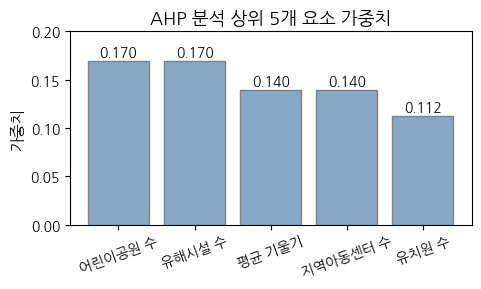

In [ ]:
import matplotlib.pyplot as plt

# 상위 5개 요소만 추출
top_5_weights = {
    '어린이공원 수': 0.1696,
    '유해시설 수': 0.1696,
    '평균 기울기': 0.1395,
    '지역아동센터 수': 0.1395,
    '유치원 수': 0.1123,
}

# 시각화
plt.figure(figsize=(5, 3))
bars = plt.bar(top_5_weights.keys(), top_5_weights.values(), color='#87a8c5', edgecolor='gray')

plt.title('AHP 분석 상위 5개 요소 가중치', fontsize=13)
plt.ylabel('가중치', fontsize=11)
plt.xticks(rotation=20)
plt.ylim(0, 0.2)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# AHP 가중치 딕셔너리
weights_dict = {
    'youth_population': 0.225696,
    'child_park_score': 0.1696,
    'hazardous_score': 0.1696,
    'avg_slope': 0.1395,
    'kid_center_score': 0.1395,
    'kindergarten_score': 0.1123,
    'school_score': 0.1123,
    'kids_cafe_score': 0.0870,
    'elderly_population': 0.0636,
    'senior_welfare_score': 0.0494,
    'land_price': 0.0494,
    'parking_score': 0.0494
}

# 한국어 번역
korean_labels = {
    'youth_population': '유소년 인구',
    'child_park_score': '인근 공원 수',
    'hazardous_score': '유해시설 수',
    'avg_slope': '평균 기울기',
    'kid_center_score': '지역아동센터 수',
    'kindergarten_score': '유치원 수',
    'school_score': '초등학교 수',
    'kids_cafe_score': '키즈카페 수',
    'elderly_population': '노인 인구수',
    'senior_welfare_score': '노인복지시설 수',
    'land_price': '공시지가',
    'parking_score': '공영주차장 수'
}

# 데이터프레임 생성
df_weights = pd.DataFrame({
    '항목': [korean_labels[k] for k in weights_dict.keys()],
    '가중치': list(weights_dict.values())
})

df_weights = df_weights.sort_values(by='가중치', ascending=False).reset_index(drop=True)



In [ ]:
df_weights

,항목,가중치
0,유소년 인구,0.225696
1,인근 공원 수,0.169600
2,유해시설 수,0.169600
3,평균 기울기,0.139500
4,지역아동센터 수,0.139500
5,유치원 수,0.112300
6,초등학교 수,0.112300
7,키즈카페 수,0.087000
8,노인 인구수,0.063600
9,노인복지시설 수,0.049400
